# DATA

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

Text(0.5, 0, 'color_intensity')

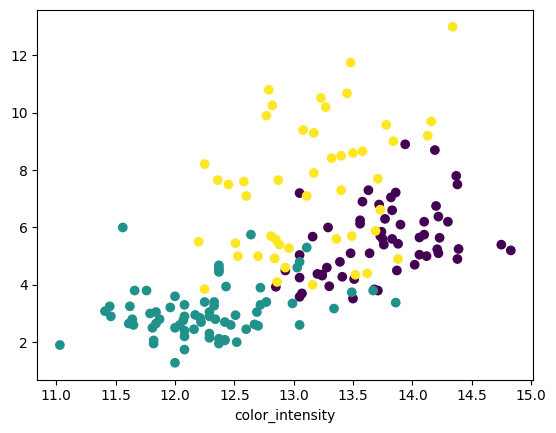

In [2]:
wine = datasets.load_wine()
data = wine.data[:,[0,9]]
target = wine.target
plt.scatter(data[:,0], data[:,1], c=target)
plt.xlabel(wine.feature_names[0])
plt.xlabel(wine.feature_names[9])

## NORMALIZAR

In [3]:
from sklearn.preprocessing import StandardScaler

Text(0.5, 0, 'color_intensity')

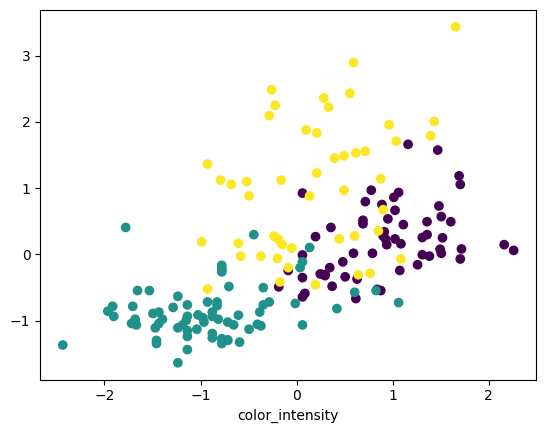

In [4]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
plt.scatter(data[:,0], data[:,1], c=target)
plt.xlabel(wine.feature_names[0])
plt.xlabel(wine.feature_names[9])

# REDE

In [5]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.init as init

In [44]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

# CLASSE

In [7]:
class MinhaRede(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRede, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()

    def forward(self, x):
        feature  = self.relu(self.hidden(x))
        output = self.softmax(self.out(feature))
        return output

In [8]:
input_size=data.shape[1]
hidden_size=32
output_size=len(np.unique(target))

net = MinhaRede(input_size,hidden_size,output_size).to(device)
net

MinhaRede(
  (hidden): Linear(in_features=2, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)

## PERDA

In [9]:
criterion = nn.CrossEntropyLoss().to(device)
criterion

CrossEntropyLoss()

## OTIMIZADOR

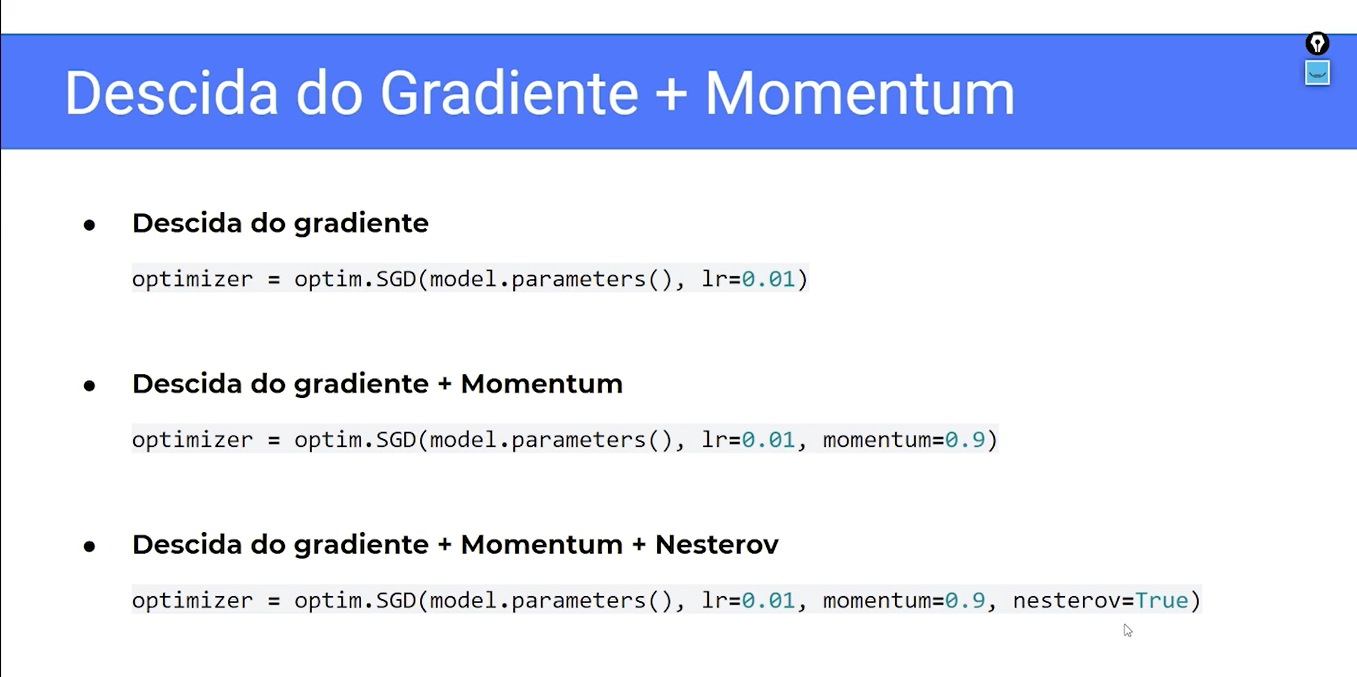

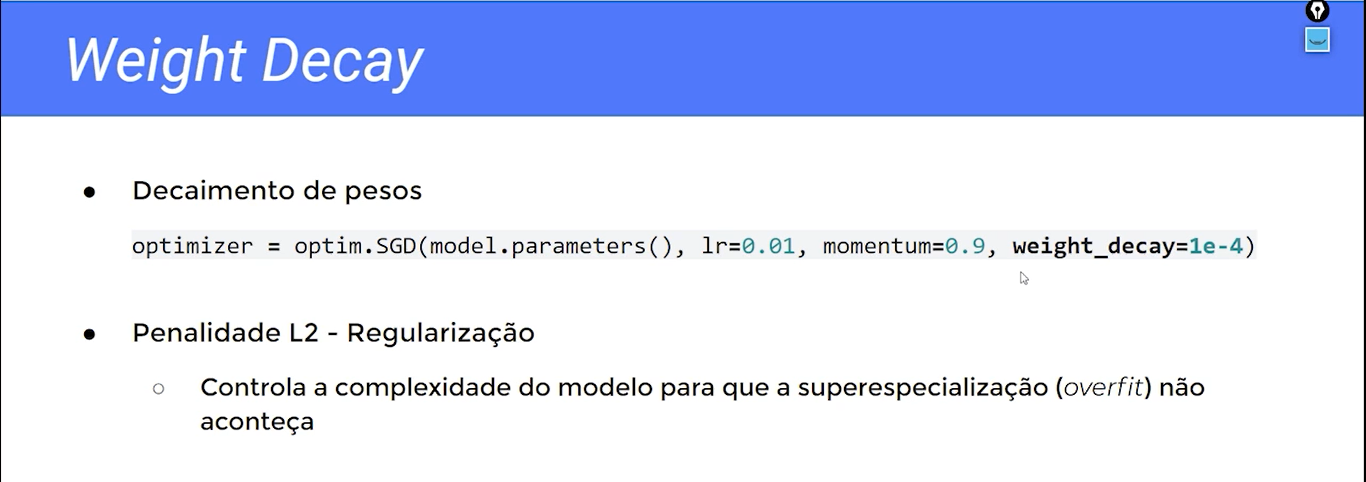

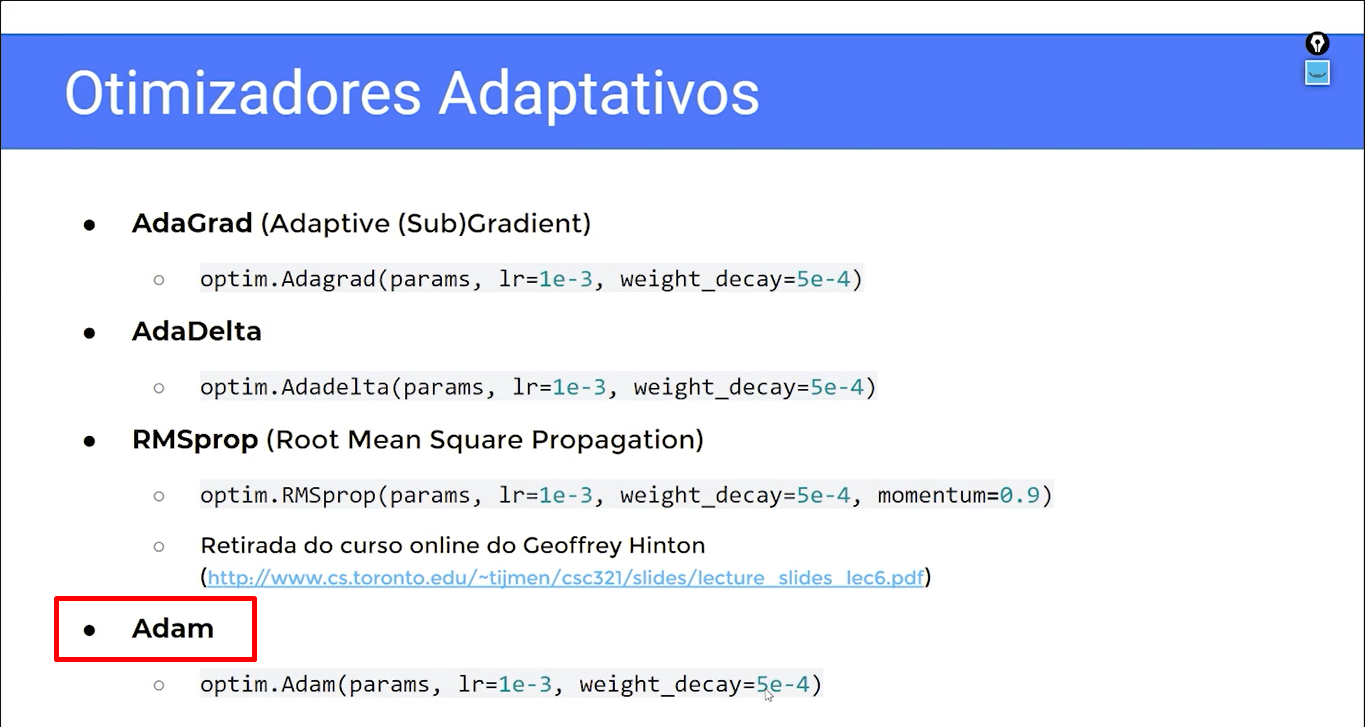

In [10]:
optimizer = optim.Adam(
    net.parameters(), 
    lr=0.001,
    weight_decay=0.0005
)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0005
)

# PLOTAR

In [11]:
def plot_boundaries(model, X, y, resolution=0.01):
    """
    Plota os limites de decisão de um modelo treinado.
    
    Parameters:
        model: Rede neural treinada (modelo PyTorch)
        X: Dados de entrada (tensor PyTorch ou numpy array)
        y: Rótulos (tensor PyTorch ou numpy array)
        resolution: Resolução da malha para a visualização
    """
    model.eval()  # Modo de avaliação
    
    if isinstance(X, np.ndarray):
        X_np = X
    else:
        X_np = X.numpy()
    
    x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
    y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.FloatTensor(grid)
    
    with torch.no_grad():
        preds = model(grid_tensor)
        preds = preds.argmax(dim=1).numpy()
    
    preds = preds.reshape(xx.shape)
    
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.brg)
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y, cmap=plt.cm.brg, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries')
    plt.show()


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


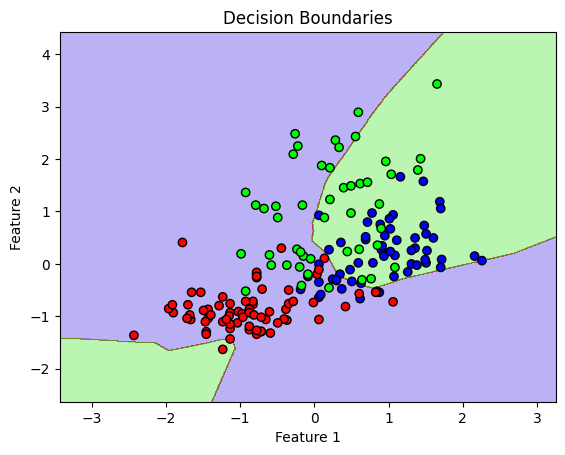

In [12]:
plot_boundaries(net, data, target)

## TREINAMENTO

In [13]:
# datas para tensores
x = torch.FloatTensor(data).to(device)
y = torch.LongTensor(target).to(device)

EPOCH: 0, LOSS: 1.097821593284607


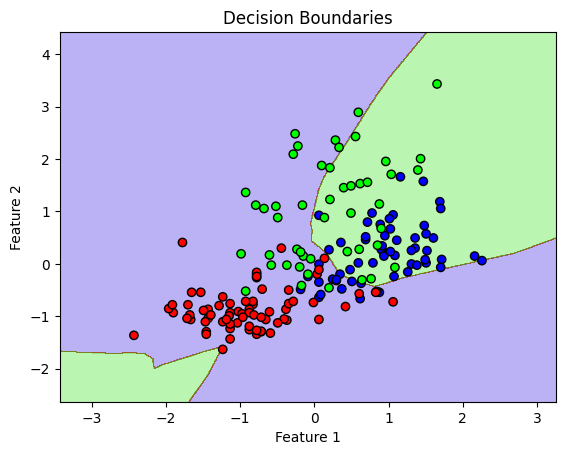

EPOCH: 300, LOSS: 0.7138275504112244


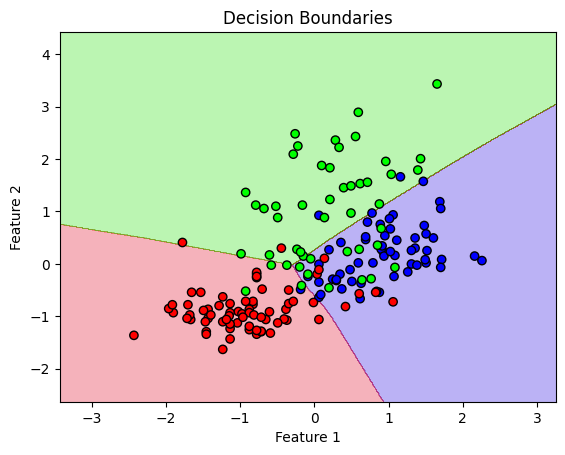

EPOCH: 600, LOSS: 0.6902152299880981


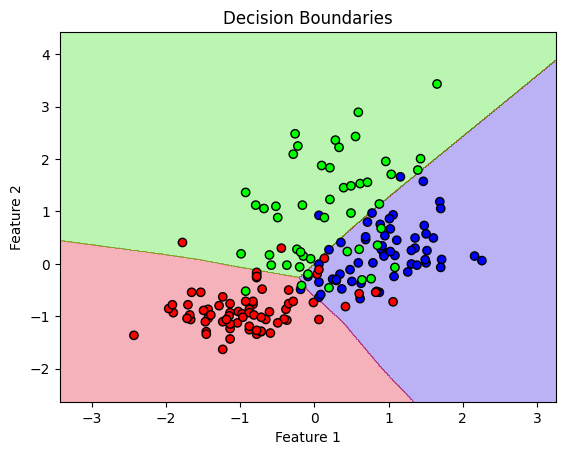

EPOCH: 799, LOSS: 0.6835465431213379


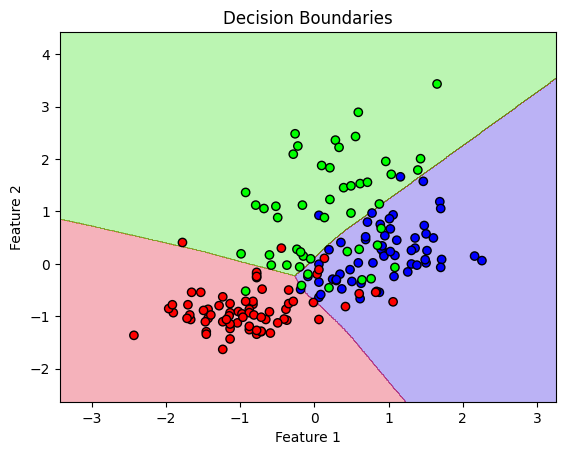

In [14]:
epochs = 800
show_step = 300
for epoch in range(epochs):
    #forward
    pred = net(x)
    loss = criterion(pred, y)    

    #backward
    loss.backward()
    optimizer.step()
    if epoch % show_step == 0 or epoch == epochs-1:
        print(f'EPOCH: {epoch}, LOSS: {loss.data}')
        plot_boundaries(net, data, target)



# HIPERPARAMETROS

https://colab.research.google.com/drive/1RoCdNPbMbWFYl3v5llRwTLK7-s60jrsj#scrollTo=hcALJzpzHKuJ

In [19]:
from torchvision import transforms, datasets

In [18]:
args = {
    'batch_size':20,
}

In [25]:
#dataset
train_set = datasets.MNIST(r'C:\Users\Usuario\Desktop\datasets_pytorch', train=True,download=True, transform=transforms.ToTensor())
test_set = datasets.MNIST(r'C:\Users\Usuario\Desktop\datasets_pytorch', train=False,download=True, transform=transforms.ToTensor())

print(train_set)
print(test_set)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 7.22MB/s]


Extracting C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 199kB/s]


Extracting C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 1.84MB/s]


Extracting C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 897kB/s]


Extracting C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Usuario\Desktop\datasets_pytorch\MNIST\raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\Usuario\Desktop\datasets_pytorch
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\Usuario\Desktop\datasets_pytorch
    Split: Test
    StandardTransform
Transform: ToTensor()


In [26]:
print(type(train_set))
print(len(train_set))

print(type(test_set))
print(len(test_set))

<class 'torchvision.datasets.mnist.MNIST'>
60000
<class 'torchvision.datasets.mnist.MNIST'>
10000


# dataloader

In [29]:
from torch.utils.data import DataLoader
import os

In [30]:
max(1, os.cpu_count() - 1)

3

In [31]:
train_loader = DataLoader(
    train_set,
    batch_size=20,
    shuffle=True,
    num_workers=max(1, os.cpu_count() - 1)
)

test_loader = DataLoader(
    test_set,
    batch_size=20,
    shuffle=True,
    num_workers=max(1, os.cpu_count() - 1)
)

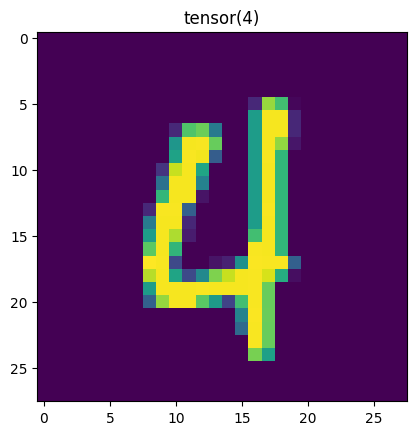

In [35]:
for i in train_loader:
    dado,rotulo = i
    plt.imshow(dado[3][0])
    plt.title(rotulo[3])
    break

In [37]:
class MinhaRedeMnist(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRedeMnist, self).__init__()
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
        ) 
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        x=x.view(x.size(0),-1)
        feature  = self.features(x)
        output = self.softmax(self.out(feature))
        return output

In [38]:
input_size=28*28
hidden_size=128
output_size=10

net_mnist = MinhaRedeMnist(input_size,hidden_size,output_size).to(device)
net_mnist

MinhaRedeMnist(
  (features): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (out): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [39]:
criterion = nn.CrossEntropyLoss().to(device)

In [41]:
optimizer = optim.Adam(
    net_mnist.parameters(),
    lr=0.001,
    weight_decay=0.0005
)

In [43]:
epochs = 30
show_step = 1
for epoch in range(epochs):
    for batch in train_loader:
        dado, rotulo = batch
        dado = dado.to(device)
        rotulo = rotulo.to(device)
        
        #forward
        pred = net_mnist(dado)
        loss = criterion(pred, rotulo)    

        #backward
        loss.backward()
        optimizer.step()

    if epoch % show_step == 0 or epoch == epochs-1:
        print(f'EPOCH: {epoch}, LOSS: {loss.data}')



c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


EPOCH: 0, LOSS: 2.4111504554748535
EPOCH: 1, LOSS: 2.3611505031585693
EPOCH: 2, LOSS: 2.4111504554748535
EPOCH: 3, LOSS: 2.461150646209717
EPOCH: 4, LOSS: 2.3611505031585693
EPOCH: 5, LOSS: 2.461150646209717


KeyboardInterrupt: 